# 引入python依赖库

In [1]:
# !python -m pip install openpyxl > pip_install.log

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

import notebook_helper as nbhelper

pd.set_option('display.max_rows', 30)

In [3]:
rc_file_path = plt.matplotlib_fname()
print(rc_file_path)
import shutil
# 不当前目录的下的matplotlibrc 复制到 rc_file_path
# shutil.copyfile('./matplotlibrc', rc_file_path)

matplotlibrc


# 985大学

In [4]:
university_985_df = pd.read_excel('中国大学专业分析.xlsx', sheet_name='985大学')
university_985_df

,排名,名称,所在地,生源质量分
0,1,清华大学,北京,100
1,2,北京大学,北京,96.4
2,3,中国科学技术大学,安徽,92.1
3,4,复旦大学,上海,91.5
4,5,中国人民大学,北京,90.8
...,...,...,...,...
34,35,中央民族大学,北京,69.8
35,36,东北大学,辽宁,69
36,37,兰州大学,甘肃,68.7
37,38,西北农林科技大学,陕西,62.1


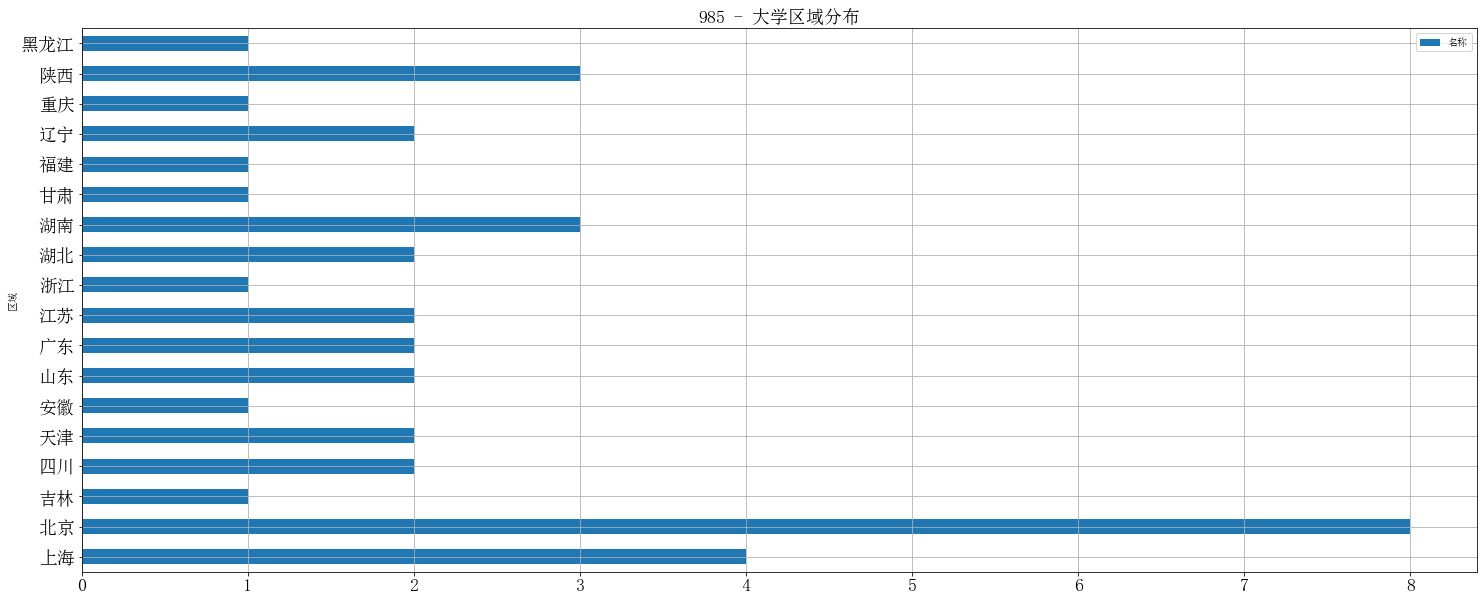

In [5]:
area_dist_985_df = university_985_df[['名称', '所在地']].groupby(by=['所在地']).count()
fig = area_dist_985_df.plot(kind='barh', title='985 - 大学区域分布', xticks = range(0, area_dist_985_df.max()[0] + 1), xlabel='区域', figsize=(25,10), grid=True, fontsize=18)
fig.axes.title.set_size(18)

# 211大学

In [6]:
university_211_df = pd.read_excel('中国大学专业分析.xlsx', sheet_name='211大学')
university_211_df

,排名,名称,所在地,生源质量分
0,1,清华大学,北京,100
1,2,北京大学,北京,96.4
2,3,中国科学技术大学,安徽,92.1
3,4,复旦大学,上海,91.5
4,5,中国人民大学,北京,90.8
...,...,...,...,...
110,暂无,国防科技大学,湖南,暂无
111,暂无,中央音乐学院,北京,暂无
112,暂无,第二军医大学,上海,暂无
113,暂无,第四军医大学,陕西,暂无


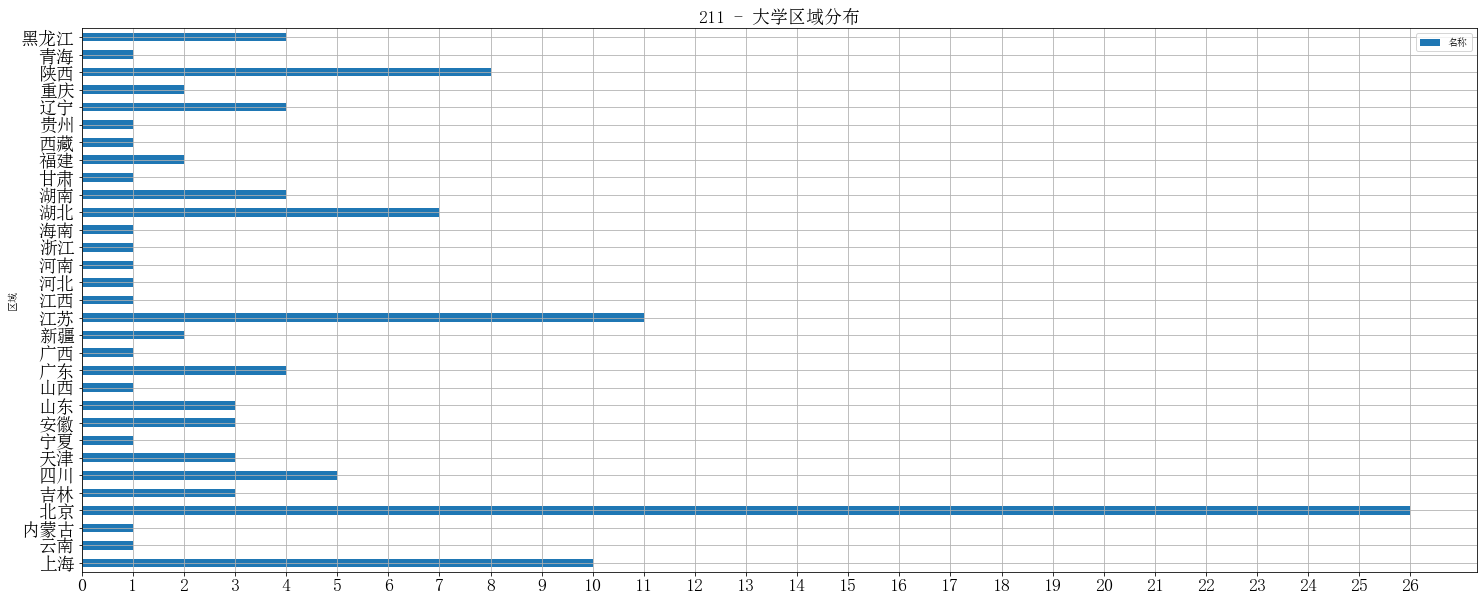

In [7]:
area_dist_211_df = university_211_df[['名称', '所在地']].groupby(by=['所在地']).count()
fig = area_dist_211_df.plot(kind='barh', title='211 - 大学区域分布', xticks = range(0, area_dist_211_df.max()[0] + 1), xlabel='区域', figsize=(25,10), grid=True, fontsize=18)
fig.axes.title.set_size(18)

# 双一流大学

In [8]:
university_fisrt_class_df = pd.read_excel('中国大学专业分析.xlsx', sheet_name='双一流大学')
university_fisrt_class_df

,序号,学校,所在地,双一流建设学科
0,1,北京大学,北京,（自主确定建设学科并自行公布）
1,2,中国人民大学,北京,哲学、理论经济学、应用经济学、法学、政治学、社会学、马克思主义理论、新闻传播学、中国史、统计...
2,3,清华大学,北京,（自主确定建设学科并自行公布）
3,4,北京交通大学,北京,系统科学
4,5,北京工业大学,北京,土木工程
...,...,...,...,...
141,143,上海科技大学,上海,材料科学与工程
142,144,中国科学院大学,北京,化学、材料科学与工程
143,145,国防科技大学,湖南,信息与通信工程、计算机科学与技术、航空宇航科学与技术、软件工程、管理科学与工程
144,146,海军军医大学,上海,基础医学


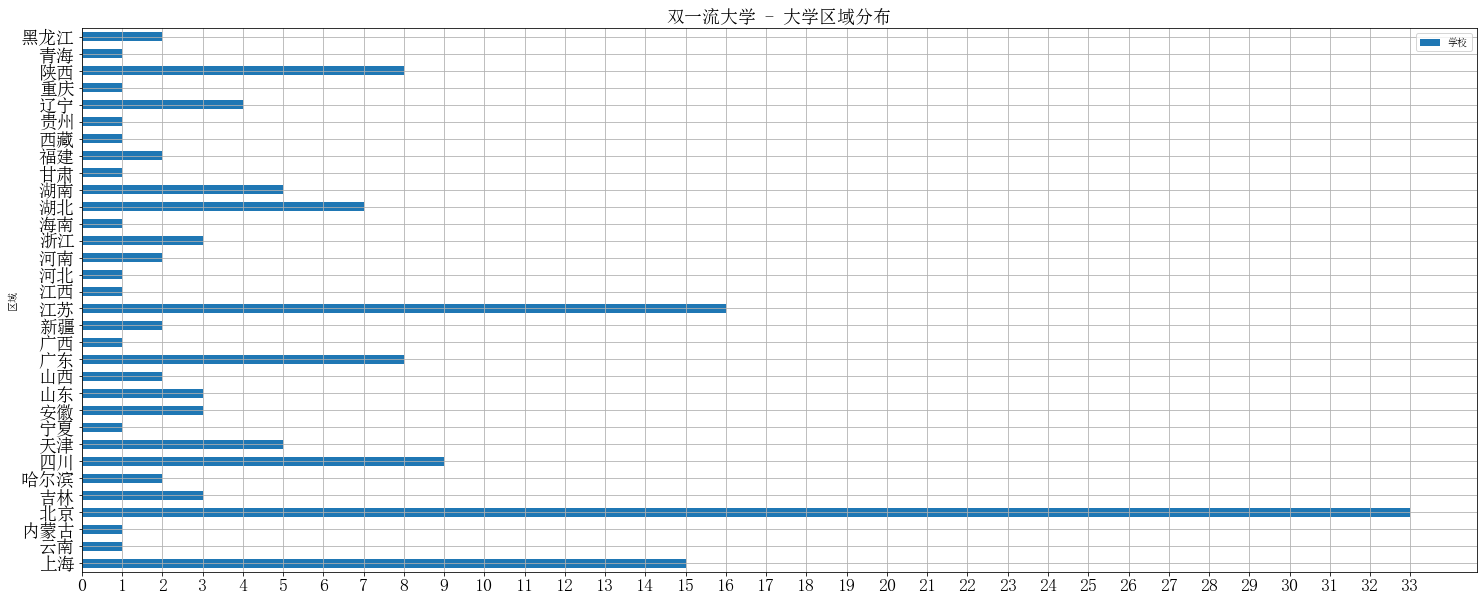

In [9]:
area_dist_first_class_df = university_fisrt_class_df[['学校', '所在地']].groupby(by=['所在地']).count()
fig = area_dist_first_class_df.plot(kind='barh', title='双一流大学 - 大学区域分布', xticks = range(0, area_dist_first_class_df.max()[0] + 1), xlabel='区域', figsize=(25,10), grid=True, fontsize=18)
fig.axes.title.set_size(18)

# 985大学都是211大学

In [10]:
university_985_211_df = pd.merge(university_985_df, university_211_df, how='inner', on='名称')
university_985_211_df.rename(columns={'名称':'学校',
                                      '所在地_x':'所在地',
                                      '排名_x':'985排名', 
                                      '生源质量分_x':'985得分', 
                                      '排名_y':'211排名',
                                      '生源质量分_y':'211得分'
                                    }, inplace=True)
university_985_211_df = university_985_211_df.loc[:, ['学校','所在地','985排名','985得分','211排名','211得分']]
university_985_211_df

,学校,所在地,985排名,985得分,211排名,211得分
0,清华大学,北京,1,100,1,100
1,北京大学,北京,2,96.4,2,96.4
2,中国科学技术大学,安徽,3,92.1,3,92.1
3,复旦大学,上海,4,91.5,4,91.5
4,中国人民大学,北京,5,90.8,5,90.8
...,...,...,...,...,...,...
34,中央民族大学,北京,35,69.8,54,69.8
35,东北大学,辽宁,36,69,60,69
36,兰州大学,甘肃,37,68.7,61,68.7
37,西北农林科技大学,陕西,38,62.1,88,62.1


# 211大学中比985好的

In [11]:
university_985_filter_df = university_985_df.replace('暂无', np.nan)
min_score_985 = university_985_filter_df['生源质量分'].min()
print('985最小分值', min_score_985)
university_985_filter_df[university_985_filter_df['生源质量分']==min_score_985]

985最小分值 62.1


,排名,名称,所在地,生源质量分
37,38.0,西北农林科技大学,陕西,62.1


In [12]:
university_211_filter_df = university_211_df.replace('暂无', np.nan)

university_211_filter_df = university_211_filter_df[(~university_211_filter_df['名称'].isin(university_985_filter_df['名称']))]
university_211_filter_df = university_211_filter_df[university_211_filter_df['生源质量分']>min_score_985]
university_211_filter_df = university_211_filter_df.astype({'排名': 'int32'})
university_211_filter_df

,排名,名称,所在地,生源质量分
9,10,上海财经大学,上海,86.2
12,13,中央财经大学,北京,85.2
15,16,对外经济贸易大学,北京,84.2
21,22,北京外国语大学,北京,81.8
23,24,中国政法大学,北京,80.8
...,...,...,...,...
82,83,陕西师范大学,陕西,63.3
83,84,南京农业大学,江苏,63.0
84,85,湖南师范大学,湖南,62.8
85,86,福州大学,福建,62.6


# 985大学中的双一流

In [13]:
university_985_first_class = pd.merge(university_985_df, university_fisrt_class_df, left_on='名称', right_on='学校')
university_985_first_class

,排名,名称,所在地_x,生源质量分,序号,学校,所在地_y,双一流建设学科
0,1,清华大学,北京,100,3,清华大学,北京,（自主确定建设学科并自行公布）
1,2,北京大学,北京,96.4,1,北京大学,北京,（自主确定建设学科并自行公布）
2,3,中国科学技术大学,安徽,92.1,83,中国科学技术大学,安徽,数学、物理学、化学、天文学、地球物理学、生物学、科学技术史、材料科学与工程、计算机科学与技术...
3,4,复旦大学,上海,91.5,51,复旦大学,上海,哲学、应用经济学、政治学、马克思主义理论、中国语言文学、外国语言文学、中国史、数学、物理学、...
4,5,中国人民大学,北京,90.8,2,中国人民大学,北京,哲学、理论经济学、应用经济学、法学、政治学、社会学、马克思主义理论、新闻传播学、中国史、统计...
...,...,...,...,...,...,...,...,...
34,35,中央民族大学,北京,69.8,28,中央民族大学,北京,民族学
35,36,东北大学,辽宁,69,42,东北大学,辽宁,冶金工程、控制科学与工程
36,37,兰州大学,甘肃,68.7,133,兰州大学,甘肃,化学、大气科学、生态学、草学
37,38,西北农林科技大学,陕西,62.1,131,西北农林科技大学,陕西,植物保护、畜牧学


# 211大学中的双一流

In [14]:
university_211_first_class = pd.merge(university_211_df, university_fisrt_class_df, left_on='名称', right_on='学校')
university_211_first_class

,排名,名称,所在地_x,生源质量分,序号,学校,所在地_y,双一流建设学科
0,1,清华大学,北京,100,3,清华大学,北京,（自主确定建设学科并自行公布）
1,2,北京大学,北京,96.4,1,北京大学,北京,（自主确定建设学科并自行公布）
2,3,中国科学技术大学,安徽,92.1,83,中国科学技术大学,安徽,数学、物理学、化学、天文学、地球物理学、生物学、科学技术史、材料科学与工程、计算机科学与技术...
3,4,复旦大学,上海,91.5,51,复旦大学,上海,哲学、应用经济学、政治学、马克思主义理论、中国语言文学、外国语言文学、中国史、数学、物理学、...
4,5,中国人民大学,北京,90.8,2,中国人民大学,北京,哲学、理论经济学、应用经济学、法学、政治学、社会学、马克思主义理论、新闻传播学、中国史、统计...
...,...,...,...,...,...,...,...,...
108,109,石河子大学,新疆,40.6,137,石河子大学,新疆,化学工程与技术
109,110,青海大学,青海,36.9,134,青海大学,青海,生态学
110,暂无,国防科技大学,湖南,暂无,145,国防科技大学,湖南,信息与通信工程、计算机科学与技术、航空宇航科学与技术、软件工程、管理科学与工程
111,暂无,中央音乐学院,北京,暂无,24,中央音乐学院,北京,音乐与舞蹈学


# 211大学包括计算机和软件学科

In [15]:
university_211_first_class_programming = university_211_first_class[university_211_first_class['双一流建设学科'].str.contains('计算机|软件|自主确定',regex=True)]
university_211_first_class_programming = university_211_first_class_programming[['排名', '名称', '所在地_x', '生源质量分','双一流建设学科']]
university_211_first_class_programming = university_211_first_class_programming.rename(columns={'所在地_x':'所在地'})
university_211_first_class_programming

,排名,名称,所在地,生源质量分,双一流建设学科
0,1,清华大学,北京,100,（自主确定建设学科并自行公布）
1,2,北京大学,北京,96.4,（自主确定建设学科并自行公布）
2,3,中国科学技术大学,安徽,92.1,数学、物理学、化学、天文学、地球物理学、生物学、科学技术史、材料科学与工程、计算机科学与技术...
5,6,上海交通大学,上海,90.5,数学、物理学、化学、生物学、机械工程、材料科学与工程、电子科学与技术、信息与通信工程、控制科...
6,7,南京大学,江苏,88.4,哲学、理论经济学、中国语言文学、外国语言文学、物理学、化学、天文学、大气科学、地质学、生物学...
8,9,浙江大学,浙江,86.3,化学、生物学、生态学、机械工程、光学工程、材料科学与工程、动力工程及工程热物理、电气工程、控...
11,12,北京航空航天大学,北京,85.4,力学、仪器科学与技术、材料科学与工程、控制科学与工程、计算机科学与技术、交通运输工程、航空宇...
18,19,华中科技大学,湖北,82.4,机械工程、光学工程、材料科学与工程、动力工程及工程热物理、电气工程、计算机科学与技术、基础医...
20,21,东南大学,江苏,81.8,机械工程、材料科学与工程、电子科学与技术、信息与通信工程、控制科学与工程、计算机科学与技术、...
25,26,哈尔滨工业大学,黑龙江,78.2,力学、机械工程、材料科学与工程、控制科学与工程、计算机科学与技术、土木工程、航空宇航科学与技...


# 专业 - 人工智能 - 排名

In [16]:
university_ai_df = pd.read_excel('中国大学专业分析.xlsx', sheet_name='人工智能-排名')
university_ai_df.rename(columns={'序号':'人工智能-排名','评选结果':'人工智能-评选结果'}, inplace=True)
university_ai_df

,人工智能-排名,学校代码,学校名称,人工智能-评选结果
0,1,10614,电子科技大学,A+
1,2,10701,西安电子科技大学,A+
2,3,10001,北京大学,A
3,4,10003,清华大学,A
4,5,10286,东南大学,A
...,...,...,...,...
69,70,10356,中国计量大学,C-
70,71,10459,郑州大学,C-
71,72,10497,武汉理工大学,C-
72,73,10590,深圳大学,C-


# 专业 - 物联网工程- 排名

In [17]:
university_iot_df = pd.read_excel('中国大学专业分析.xlsx', sheet_name='物联网工程-排名')
university_iot_df.rename(columns={'序号':'物联网工程-排名','评选结果':'物联网工程-评选结果'}, inplace=True)
university_iot_df

,物联网工程-排名,学校代码,学校名称,物联网工程-评选结果
0,1,10001,北京大学,A+
1,2,10003,清华大学,A+
2,3,10335,浙江大学,A+
3,4,90002,国防科技大学,A+
4,5,10006,北京航空航天大学,A
...,...,...,...,...
163,164,10254,上海海事大学,C-
164,165,10289,江苏科技大学,C-
165,166,10385,华侨大学,C-
166,167,10405,东华理工大学,C-


# 专业 - 大数据管理与应用- 排名

In [18]:
university_big_data_df = pd.read_excel('中国大学专业分析.xlsx', sheet_name='大数据管理与应用-排名')
university_big_data_df.rename(columns={'序号':'大数据管理与应用-排名','评选结果':'大数据管理与应用-评选结果'}, inplace=True)
university_big_data_df

,大数据管理与应用-排名,学校代码,学校名称,大数据管理与应用-评选结果
0,1,10614,电子科技大学,A+
1,2,10701,西安电子科技大学,A+
2,3,10001,北京大学,A
3,4,10003,清华大学,A
4,5,10286,东南大学,A
...,...,...,...,...
69,70,10356,中国计量大学,C-
70,71,10459,郑州大学,C-
71,72,10497,武汉理工大学,C-
72,73,10590,深圳大学,C-


# 专业 - 计算机科学与技术 - 排名

In [19]:
university_computer_df = pd.read_excel('中国大学专业分析.xlsx', sheet_name='计算机科学与技术-排名')
university_computer_df.rename(columns={'序号':'计算机科学与技术-排名','评选结果':'计算机科学与技术-评选结果'}, inplace=True)
university_computer_df

,计算机科学与技术-排名,学校代码,学校名称,计算机科学与技术-评选结果
0,1,10001,北京大学,A+
1,2,10003,清华大学,A+
2,3,10335,浙江大学,A+
3,4,91002,国防科技大学,A+
4,5,10006,北京航空航天大学,A
...,...,...,...,...
163,164,10651,西南财经大学,C-
164,165,10705,西安石油大学,C-
165,166,11232,北京信息科技大学,C-
166,167,11535,湖南工业大学,C-


# 专业 - 软件工程 - 排名

In [20]:
university_software_df = pd.read_excel('中国大学专业分析.xlsx', sheet_name='软件工程-排名')
university_software_df.rename(columns={'序号':'软件工程-排名','评选结果':'软件工程-评选结果'}, inplace=True)
university_software_df

,软件工程-排名,学校代码,学校名称,软件工程-评选结果
0,1,10006,北京航空航天大学,A+
1,2,10335,浙江大学,A+
2,3,90002,国防科技大学,A+
3,4,10001,北京大学,A
4,5,10003,清华大学,A
...,...,...,...,...
113,114,10623,西华大学,C-
114,115,10636,四川师范大学,C-
115,116,10674,昆明理工大学,C-
116,117,10710,长安大学,C-


# 综合专业排名

In [21]:
university_names_211 = university_211_df['名称']
university_names_985 = university_985_df['名称']
university_names_first_class = university_fisrt_class_df['学校']
university_major_df = pd.merge(university_software_df, university_computer_df, how='outer', on=['学校代码','学校名称'])
university_major_df = pd.merge(university_major_df, university_big_data_df, how='outer', on=['学校代码','学校名称'])
university_major_df = pd.merge(university_major_df, university_iot_df, how='outer', on=['学校代码','学校名称'])
university_major_df = pd.merge(university_major_df, university_ai_df, how='outer', on=['学校代码','学校名称'])
university_major_df['是否211大学'] = university_major_df['学校名称'].isin(university_names_211)
university_major_df['是否985大学'] = university_major_df['学校名称'].isin(university_names_985)
university_major_df['是否双一流大学'] = university_major_df['学校名称'].isin(university_names_first_class)
university_major_df

,软件工程-排名,学校代码,学校名称,软件工程-评选结果,计算机科学与技术-排名,计算机科学与技术-评选结果,大数据管理与应用-排名,大数据管理与应用-评选结果,物联网工程-排名,物联网工程-评选结果,人工智能-排名,人工智能-评选结果,是否211大学,是否985大学,是否双一流大学
0,1.0,10006,北京航空航天大学,A+,5.0,A,12.0,B+,5.0,A,12.0,B+,True,True,True
1,2.0,10335,浙江大学,A+,3.0,A+,10.0,A-,3.0,A+,10.0,A-,True,True,True
2,3.0,90002,国防科技大学,A+,NaN,NaN,20.0,B+,4.0,A+,20.0,B+,True,True,True
3,4.0,10001,北京大学,A,1.0,A+,3.0,A,1.0,A+,3.0,A,True,True,True
4,5.0,10003,清华大学,A,2.0,A+,4.0,A,2.0,A+,4.0,A,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,NaN,90045,空军工程大学,NaN,NaN,NaN,21.0,B+,95.0,B-,21.0,B+,False,False,False
186,NaN,90006,解放军理工大学,NaN,NaN,NaN,42.0,B-,47.0,B+,42.0,B-,False,False,False
187,NaN,10512,湖北大学,NaN,NaN,NaN,57.0,C,NaN,NaN,57.0,C,False,False,False
188,NaN,90039,海军航空工程学院,NaN,NaN,NaN,63.0,C,160.0,C-,63.0,C,False,False,False


In [22]:
good_university_major_df = university_major_df[(university_major_df['是否211大学']==True)&(university_major_df['是否985大学']==True)&(university_major_df['是否双一流大学']==True)]
good_university_major_df = nbhelper.ahead_df_columns(good_university_major_df,['学校代码','学校名称'])
good_university_major_df.reset_index(inplace=True, drop=True)
good_university_major_df

,学校代码,学校名称,软件工程-排名,软件工程-评选结果,计算机科学与技术-排名,计算机科学与技术-评选结果,大数据管理与应用-排名,大数据管理与应用-评选结果,物联网工程-排名,物联网工程-评选结果,人工智能-排名,人工智能-评选结果,是否211大学,是否985大学,是否双一流大学
0,10006,北京航空航天大学,1.0,A+,5.0,A,12.0,B+,5.0,A,12.0,B+,True,True,True
1,10335,浙江大学,2.0,A+,3.0,A+,10.0,A-,3.0,A+,10.0,A-,True,True,True
2,90002,国防科技大学,3.0,A+,NaN,NaN,20.0,B+,4.0,A+,20.0,B+,True,True,True
3,10001,北京大学,4.0,A,1.0,A+,3.0,A,1.0,A+,3.0,A,True,True,True
4,10003,清华大学,5.0,A,2.0,A+,4.0,A,2.0,A+,4.0,A,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,10027,北京师范大学,NaN,NaN,48.0,B,NaN,NaN,61.0,B,NaN,NaN,True,True,True
36,10730,兰州大学,NaN,NaN,70.0,B,52.0,C+,59.0,B,52.0,C+,True,True,True
37,10019,中国农业大学,NaN,NaN,73.0,B-,NaN,NaN,73.0,B-,NaN,NaN,True,True,True
38,10712,西北农林科技大学,NaN,NaN,138.0,C,NaN,NaN,138.0,C,NaN,NaN,True,True,True


In [23]:
nbhelper.highlight_columns(good_university_major_df[pd.notna(good_university_major_df['软件工程-评选结果'])].reset_index(),['软件工程-排名', '软件工程-评选结果'])

,index,学校代码,学校名称,软件工程-排名,软件工程-评选结果,计算机科学与技术-排名,计算机科学与技术-评选结果,大数据管理与应用-排名,大数据管理与应用-评选结果,物联网工程-排名,物联网工程-评选结果,人工智能-排名,人工智能-评选结果,是否211大学,是否985大学,是否双一流大学
0,0,10006,北京航空航天大学,1.000000,A+,5.000000,A,12.000000,B+,5.000000,A,12.000000,B+,True,True,True
1,1,10335,浙江大学,2.000000,A+,3.000000,A+,10.000000,A-,3.000000,A+,10.000000,A-,True,True,True
2,2,90002,国防科技大学,3.000000,A+,nan,nan,20.000000,B+,4.000000,A+,20.000000,B+,True,True,True
3,3,10001,北京大学,4.000000,A,1.000000,A+,3.000000,A,1.000000,A+,3.000000,A,True,True,True
4,4,10003,清华大学,5.000000,A,2.000000,A+,4.000000,A,2.000000,A+,4.000000,A,True,True,True
5,5,10269,华东师范大学,6.000000,A,32.000000,B+,25.000000,B,32.000000,B+,25.000000,B,True,True,True
6,6,10284,南京大学,7.000000,A,9.000000,A,9.000000,A-,9.000000,A,9.000000,A-,True,True,True
7,7,10486,武汉大学,8.000000,A,18.000000,A-,29.000000,B,18.000000,A-,29.000000,B,True,True,True
8,8,10056,天津大学,9.000000,A-,28.000000,B+,14.000000,B+,28.000000,B+,14.000000,B+,True,True,True
9,9,10145,东北大学,10.000000,A-,14.000000,A-,nan,nan,14.000000,A-,nan,nan,True,True,True


In [24]:
nbhelper.highlight_columns(good_university_major_df[pd.notna(good_university_major_df['计算机科学与技术-评选结果'])].reset_index(),['计算机科学与技术-排名', '计算机科学与技术-评选结果'])

,index,学校代码,学校名称,软件工程-排名,软件工程-评选结果,计算机科学与技术-排名,计算机科学与技术-评选结果,大数据管理与应用-排名,大数据管理与应用-评选结果,物联网工程-排名,物联网工程-评选结果,人工智能-排名,人工智能-评选结果,是否211大学,是否985大学,是否双一流大学
0,0,10006,北京航空航天大学,1.000000,A+,5.000000,A,12.000000,B+,5.000000,A,12.000000,B+,True,True,True
1,1,10335,浙江大学,2.000000,A+,3.000000,A+,10.000000,A-,3.000000,A+,10.000000,A-,True,True,True
2,3,10001,北京大学,4.000000,A,1.000000,A+,3.000000,A,1.000000,A+,3.000000,A,True,True,True
3,4,10003,清华大学,5.000000,A,2.000000,A+,4.000000,A,2.000000,A+,4.000000,A,True,True,True
4,5,10269,华东师范大学,6.000000,A,32.000000,B+,25.000000,B,32.000000,B+,25.000000,B,True,True,True
5,6,10284,南京大学,7.000000,A,9.000000,A,9.000000,A-,9.000000,A,9.000000,A-,True,True,True
6,7,10486,武汉大学,8.000000,A,18.000000,A-,29.000000,B,18.000000,A-,29.000000,B,True,True,True
7,8,10056,天津大学,9.000000,A-,28.000000,B+,14.000000,B+,28.000000,B+,14.000000,B+,True,True,True
8,9,10145,东北大学,10.000000,A-,14.000000,A-,nan,nan,14.000000,A-,nan,nan,True,True,True
9,10,10213,哈尔滨工业大学,11.000000,A-,7.000000,A,24.000000,B,7.000000,A,24.000000,B,True,True,True


In [25]:
nbhelper.highlight_columns(good_university_major_df[pd.notna(good_university_major_df['大数据管理与应用-评选结果'])].reset_index(),['大数据管理与应用-排名', '大数据管理与应用-评选结果'])

,index,学校代码,学校名称,软件工程-排名,软件工程-评选结果,计算机科学与技术-排名,计算机科学与技术-评选结果,大数据管理与应用-排名,大数据管理与应用-评选结果,物联网工程-排名,物联网工程-评选结果,人工智能-排名,人工智能-评选结果,是否211大学,是否985大学,是否双一流大学
0,0,10006,北京航空航天大学,1.000000,A+,5.000000,A,12.000000,B+,5.000000,A,12.000000,B+,True,True,True
1,1,10335,浙江大学,2.000000,A+,3.000000,A+,10.000000,A-,3.000000,A+,10.000000,A-,True,True,True
2,2,90002,国防科技大学,3.000000,A+,nan,nan,20.000000,B+,4.000000,A+,20.000000,B+,True,True,True
3,3,10001,北京大学,4.000000,A,1.000000,A+,3.000000,A,1.000000,A+,3.000000,A,True,True,True
4,4,10003,清华大学,5.000000,A,2.000000,A+,4.000000,A,2.000000,A+,4.000000,A,True,True,True
5,5,10269,华东师范大学,6.000000,A,32.000000,B+,25.000000,B,32.000000,B+,25.000000,B,True,True,True
6,6,10284,南京大学,7.000000,A,9.000000,A,9.000000,A-,9.000000,A,9.000000,A-,True,True,True
7,7,10486,武汉大学,8.000000,A,18.000000,A-,29.000000,B,18.000000,A-,29.000000,B,True,True,True
8,8,10056,天津大学,9.000000,A-,28.000000,B+,14.000000,B+,28.000000,B+,14.000000,B+,True,True,True
9,10,10213,哈尔滨工业大学,11.000000,A-,7.000000,A,24.000000,B,7.000000,A,24.000000,B,True,True,True


In [26]:
nbhelper.highlight_columns(good_university_major_df[pd.notna(good_university_major_df['物联网工程-评选结果'])].reset_index(),['物联网工程-排名', '物联网工程-评选结果'])

,index,学校代码,学校名称,软件工程-排名,软件工程-评选结果,计算机科学与技术-排名,计算机科学与技术-评选结果,大数据管理与应用-排名,大数据管理与应用-评选结果,物联网工程-排名,物联网工程-评选结果,人工智能-排名,人工智能-评选结果,是否211大学,是否985大学,是否双一流大学
0,0,10006,北京航空航天大学,1.000000,A+,5.000000,A,12.000000,B+,5.000000,A,12.000000,B+,True,True,True
1,1,10335,浙江大学,2.000000,A+,3.000000,A+,10.000000,A-,3.000000,A+,10.000000,A-,True,True,True
2,2,90002,国防科技大学,3.000000,A+,nan,nan,20.000000,B+,4.000000,A+,20.000000,B+,True,True,True
3,3,10001,北京大学,4.000000,A,1.000000,A+,3.000000,A,1.000000,A+,3.000000,A,True,True,True
4,4,10003,清华大学,5.000000,A,2.000000,A+,4.000000,A,2.000000,A+,4.000000,A,True,True,True
5,5,10269,华东师范大学,6.000000,A,32.000000,B+,25.000000,B,32.000000,B+,25.000000,B,True,True,True
6,6,10284,南京大学,7.000000,A,9.000000,A,9.000000,A-,9.000000,A,9.000000,A-,True,True,True
7,7,10486,武汉大学,8.000000,A,18.000000,A-,29.000000,B,18.000000,A-,29.000000,B,True,True,True
8,8,10056,天津大学,9.000000,A-,28.000000,B+,14.000000,B+,28.000000,B+,14.000000,B+,True,True,True
9,9,10145,东北大学,10.000000,A-,14.000000,A-,nan,nan,14.000000,A-,nan,nan,True,True,True


In [27]:
nbhelper.highlight_columns(good_university_major_df[pd.notna(good_university_major_df['人工智能-评选结果'])].reset_index(),['人工智能-排名', '人工智能-评选结果'])

,index,学校代码,学校名称,软件工程-排名,软件工程-评选结果,计算机科学与技术-排名,计算机科学与技术-评选结果,大数据管理与应用-排名,大数据管理与应用-评选结果,物联网工程-排名,物联网工程-评选结果,人工智能-排名,人工智能-评选结果,是否211大学,是否985大学,是否双一流大学
0,0,10006,北京航空航天大学,1.000000,A+,5.000000,A,12.000000,B+,5.000000,A,12.000000,B+,True,True,True
1,1,10335,浙江大学,2.000000,A+,3.000000,A+,10.000000,A-,3.000000,A+,10.000000,A-,True,True,True
2,2,90002,国防科技大学,3.000000,A+,nan,nan,20.000000,B+,4.000000,A+,20.000000,B+,True,True,True
3,3,10001,北京大学,4.000000,A,1.000000,A+,3.000000,A,1.000000,A+,3.000000,A,True,True,True
4,4,10003,清华大学,5.000000,A,2.000000,A+,4.000000,A,2.000000,A+,4.000000,A,True,True,True
5,5,10269,华东师范大学,6.000000,A,32.000000,B+,25.000000,B,32.000000,B+,25.000000,B,True,True,True
6,6,10284,南京大学,7.000000,A,9.000000,A,9.000000,A-,9.000000,A,9.000000,A-,True,True,True
7,7,10486,武汉大学,8.000000,A,18.000000,A-,29.000000,B,18.000000,A-,29.000000,B,True,True,True
8,8,10056,天津大学,9.000000,A-,28.000000,B+,14.000000,B+,28.000000,B+,14.000000,B+,True,True,True
9,10,10213,哈尔滨工业大学,11.000000,A-,7.000000,A,24.000000,B,7.000000,A,24.000000,B,True,True,True


In [28]:
best_high_tech_university_df = good_university_major_df[pd.notna(good_university_major_df['人工智能-评选结果']) & 
                                                        pd.notna(good_university_major_df['计算机科学与技术-评选结果']) & 
                                                        pd.notna(good_university_major_df['大数据管理与应用-评选结果']) &
                                                        pd.notna(good_university_major_df['物联网工程-评选结果']) &
                                                        pd.notna(good_university_major_df['人工智能-评选结果']) &
                                                        pd.notna(good_university_major_df['软件工程-评选结果'])
                                                       ].reset_index(drop=True)

best_high_tech_university_df = pd.merge(best_high_tech_university_df, university_211_df, how='inner', left_on='学校名称', right_on='名称')
best_high_tech_university_df = best_high_tech_university_df.drop(columns=['名称','学校代码'])
best_high_tech_university_df = nbhelper.ahead_df_columns(best_high_tech_university_df, ['学校名称', '排名', '所在地', '生源质量分'])
best_high_tech_university_df = best_high_tech_university_df.astype({'排名': 'int32', 
                                                                    '软件工程-排名': 'int32',
                                                                    '计算机科学与技术-排名': 'int32',
                                                                    '大数据管理与应用-排名': 'int32',
                                                                    '物联网工程-排名': 'int32', 
                                                                    '人工智能-排名': 'int32'
                                                                   })
best_high_tech_university_df = best_high_tech_university_df.sort_values(by=['排名', '软件工程-排名', '计算机科学与技术-排名', '大数据管理与应用-排名', '人工智能-排名','物联网工程-排名'])
best_high_tech_university_df.reset_index(drop=True)

,学校名称,排名,所在地,生源质量分,软件工程-排名,软件工程-评选结果,计算机科学与技术-排名,计算机科学与技术-评选结果,大数据管理与应用-排名,大数据管理与应用-评选结果,物联网工程-排名,物联网工程-评选结果,人工智能-排名,人工智能-评选结果,是否211大学,是否985大学,是否双一流大学
0,清华大学,1,北京,100,5,A,2,A+,4,A,2,A+,4,A,True,True,True
1,北京大学,2,北京,96.4,4,A,1,A+,3,A,1,A+,3,A,True,True,True
2,中国科学技术大学,3,安徽,92.1,15,A-,17,A-,27,B,17,A-,27,B,True,True,True
3,复旦大学,4,上海,91.5,23,B+,31,B+,7,A-,31,B+,7,A-,True,True,True
4,上海交通大学,6,上海,90.5,13,A-,8,A,8,A-,8,A,8,A-,True,True,True
5,南京大学,7,江苏,88.4,7,A,9,A,9,A-,9,A,9,A-,True,True,True
6,浙江大学,9,浙江,86.3,2,A+,3,A+,10,A-,3,A+,10,A-,True,True,True
7,南开大学,11,天津,85.9,35,B,27,B+,23,B,27,B+,23,B,True,True,True
8,北京航空航天大学,12,北京,85.4,1,A+,5,A,12,B+,5,A,12,B+,True,True,True
9,武汉大学,15,湖北,84.4,8,A,18,A-,29,B,18,A-,29,B,True,True,True


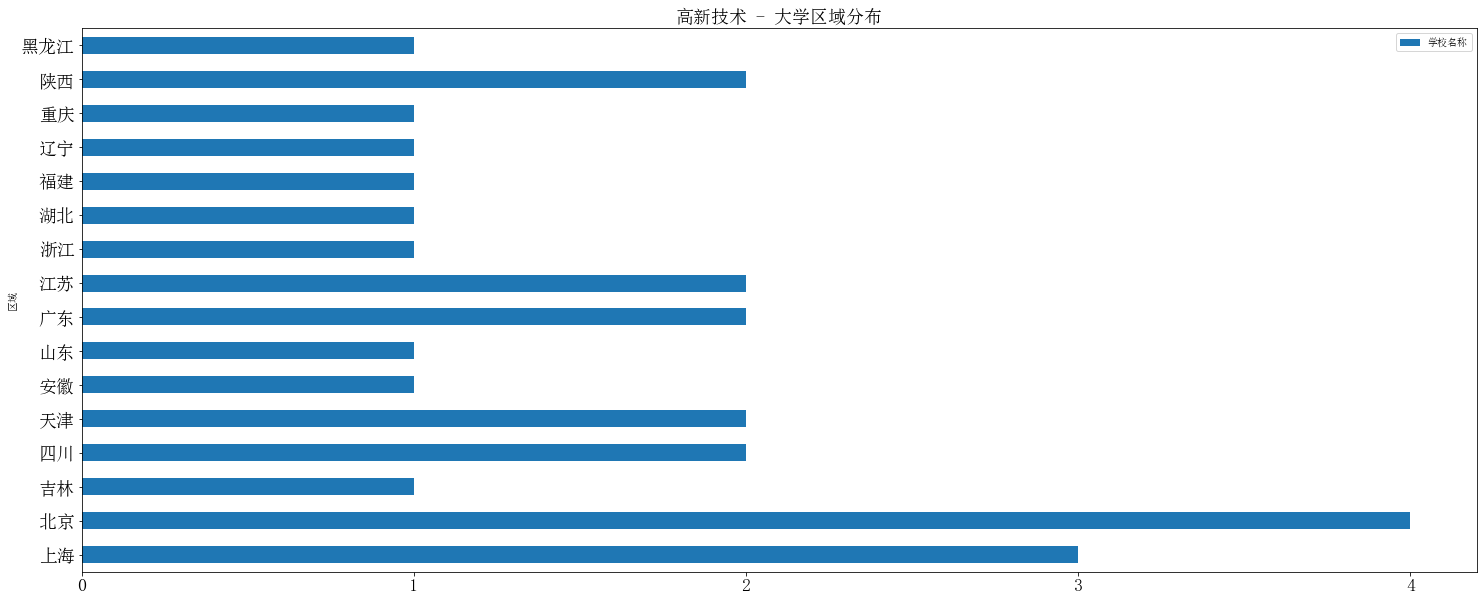

In [29]:
area_dist_high_tech_df = best_high_tech_university_df[['学校名称', '所在地']].groupby(by=['所在地']).count()
fig = area_dist_high_tech_df.plot(kind='barh', title='高新技术 - 大学区域分布', xticks = range(0, area_dist_high_tech_df.max()[0] + 1), xlabel='区域', figsize=(25,10), fontsize=18)
fig.axes.title.set_size(18)